In [73]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

In [74]:
(train_images, train_labels),(test_images,test_labels)=cifar10.load_data()

In [75]:
print(train_images.shape)

(50000, 32, 32, 3)


In [76]:
subclass=[0,8,9]
def subsets(data):
  a = []
  for index,labels in enumerate(data):
    if labels in [0,1,2]:
      a.append(index)
      
  return a

i_train = subsets(train_labels)
i_test = subsets(test_labels)

train_images= train_images[i_train]
train_labels = train_labels[i_train]

test_images = test_images[i_test]
test_labels = test_labels[i_test]

print(train_images.shape)  
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


(15000, 32, 32, 3)
(15000, 1)
(3000, 32, 32, 3)
(3000, 1)


In [77]:
#We will reshape the images into the 1D arrays of 3072 pixels that we expect
train_images = train_images.reshape(15000,32*32*3) 
test_images = test_images.reshape(3000,32*32*3)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
#Divide the image by 255 in order to  normalize it into 0-1 range
train_images/=255.0
test_images/=255.0
#print(test_images)
#print(train_images.shape)


#one-hot encoding 
new_train_labels= np_utils.to_categorical(train_labels,10)
new_test_labels =  np_utils.to_categorical(test_labels,10)


#dividing in validation and training sets
x_val=train_images[:3000]
x_train=train_images[3000:]

y_val=new_train_labels[:3000]
y_train=new_train_labels[3000:]

print(x_val.shape)
print(y_val.shape)
print(x_train.shape)
print(y_train.shape)

(3000, 3072)
(3000, 10)
(12000, 3072)
(12000, 10)


In [78]:
model= Sequential()
model.add(Dense(units=50,input_shape=(32*32*3,)))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-07, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
model.add(Activation('relu'))
#model.add(Dense(units=50,activation='relu',input_shape=(32*32*3,), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#model.add(Dense(units=50,activation='relu',input_shape=(32*32*3,), kernel_regularizer=l2(0.01), bias_regularizer=l12(0.01)))
#model.add(Dropout(0.5))
model.add(Dense(units=20))
#model.add(Dropout(0.5))
#model.add(Dense(units=100))
#model.add(Dense(20))
model.add(Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 50)                153650    
_________________________________________________________________
batch_normalization_6 (Batch (None, 50)                200       
_________________________________________________________________
activation_6 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                210       
Total params: 155,080
Trainable params: 154,980
Non-trainable params: 100
_________________________________________________________________


In [79]:
opt1 =keras.optimizers.RMSprop(
    learning_rate=0.007,
    epsilon=1e-07,
    name="RMSprop")

opt=keras.optimizers.Adagrad(
    learning_rate=0.003,
    #initial_accumulator_value=,
    epsilon=1e-07,
    name="Adagrad"
    
)
opt2=keras.optimizers.Adam(
    learning_rate=0.003,
    #initial_accumulator_value=,
    epsilon=1e-07,
    name="Adam"
)
opt3 = keras.optimizers.SGD(lr=0.01, momentum=0.9)
#model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [80]:
history = model.fit(x_train, y_train, 
                    epochs=50, validation_data=(x_val,y_val))

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 1.3177 - accuracy: 0.6148 - val_loss: 0.8966 - val_accuracy: 0.6683
Epoch 2/50
375/375 [==============================] - 2s 4ms/step - loss: 0.7287 - accuracy: 0.7378 - val_loss: 0.6792 - val_accuracy: 0.7503
Epoch 3/50
375/375 [==============================] - 2s 4ms/step - loss: 0.6642 - accuracy: 0.7530 - val_loss: 0.6398 - val_accuracy: 0.7557
Epoch 4/50
375/375 [==============================] - 2s 4ms/step - loss: 0.5949 - accuracy: 0.7730 - val_loss: 0.7329 - val_accuracy: 0.7003
Epoch 5/50
375/375 [==============================] - 2s 4ms/step - loss: 0.5667 - accuracy: 0.7848 - val_loss: 0.7036 - val_accuracy: 0.7063
Epoch 6/50
375/375 [==============================] - 2s 4ms/step - loss: 0.5478 - accuracy: 0.7928 - val_loss: 0.6615 - val_accuracy: 0.7373
Epoch 7/50
375/375 [==============================] - 2s 4ms/step - loss: 0.5162 - accuracy: 0.8015 - val_loss: 0.5984 - val_accuracy: 0.7690
Epoch 

In [82]:
#Evaluating the performance on test data
test_loss, test_accuracy = model.evaluate(test_images, new_test_labels)

94/94 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.7860


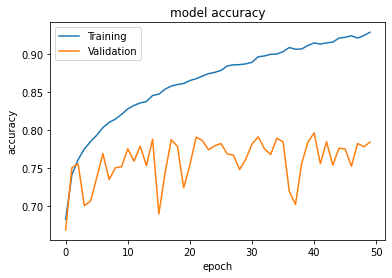

In [83]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')

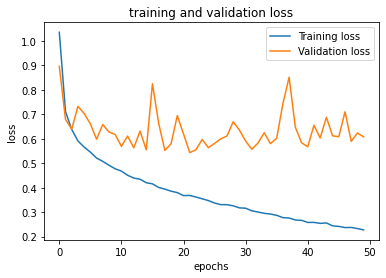

In [84]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')